In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Phishing Data - Phishing Data.csv")

In [3]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

In [5]:
df.shape

(2456, 31)

In [6]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

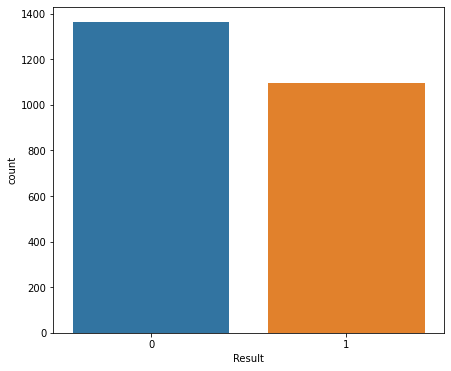

In [7]:
plt.figure(figsize=(7,6))
sns.countplot('Result', data = df)

In [8]:
df['Result'].value_counts()

0    1362
1    1094
Name: Result, dtype: int64

In [9]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [10]:
X = df.iloc[: , :-1]
y = df.iloc[:, -1:]

In [11]:
y

,Result
0,1
1,1
2,1
3,1
4,0
...,...
2451,1
2452,1
2453,0
2454,1


In [12]:
#DECISION TREE

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [15]:
clf.score(X_train, y_train)

0.996199782844734

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9527687296416938


In [17]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [18]:
dot_data = StringIO()
export_graphviz(clf, out_file= dot_data, feature_names=list(X.columns), filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

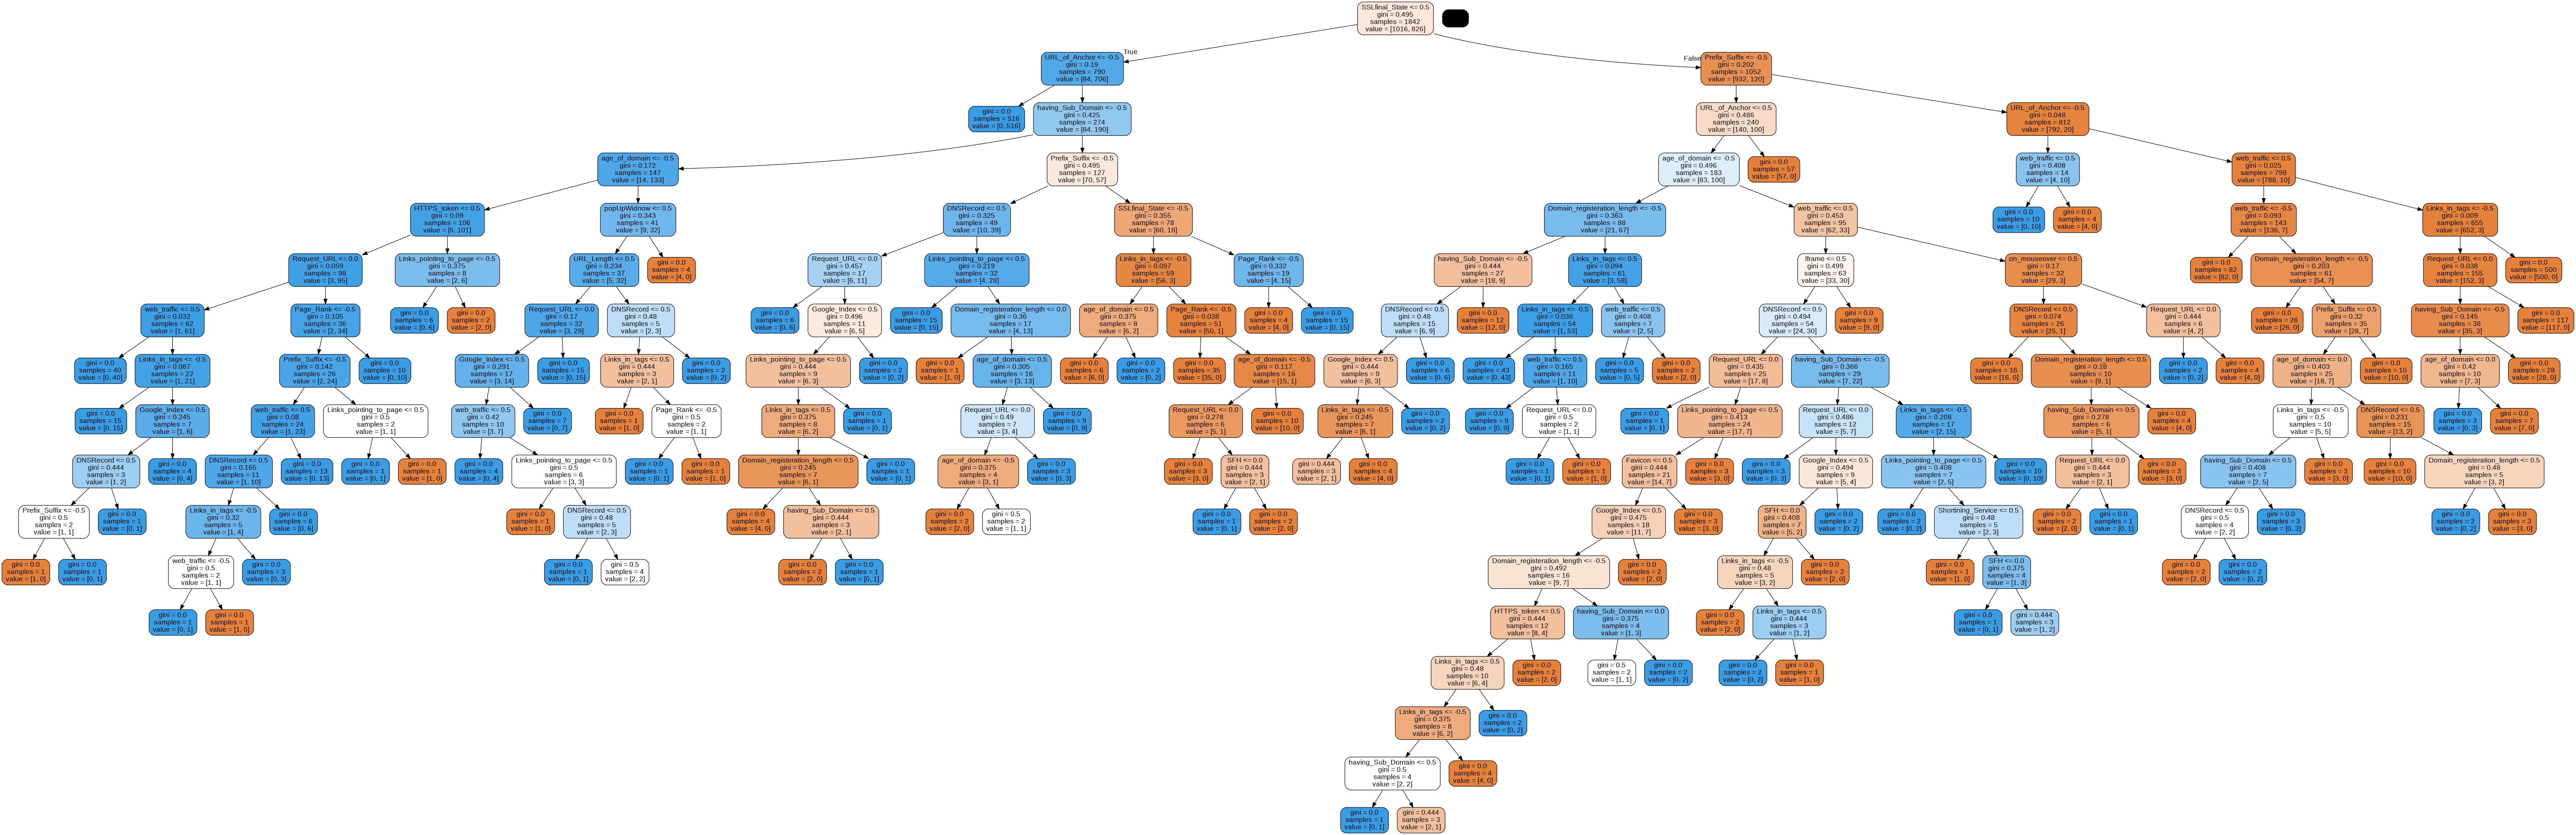

In [19]:
Image(graph.create_png())

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       346
           1       0.96      0.93      0.95       268

    accuracy                           0.95       614
   macro avg       0.95      0.95      0.95       614
weighted avg       0.95      0.95      0.95       614



In [21]:
#confusion matrix

In [22]:
confusion_matrix(y_test, y_pred)

array([[335,  11],
       [ 18, 250]])

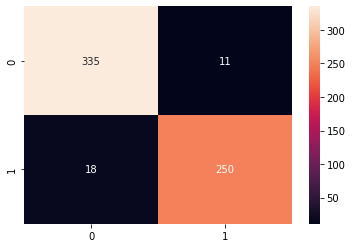

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

In [24]:
#RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
# fittin the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred = rfc.predict(X_test)


In [27]:
y_pred_train = rfc.predict(X_train)

In [28]:
from sklearn import metrics
print("Train ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred_train))

Train ACCURACY OF THE MODEL:  0.996199782844734


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       346
           1       0.95      0.97      0.96       268

    accuracy                           0.96       614
   macro avg       0.96      0.96      0.96       614
weighted avg       0.96      0.96      0.96       614



In [30]:
confusion_matrix(y_test, y_pred)

array([[332,  14],
       [  9, 259]])

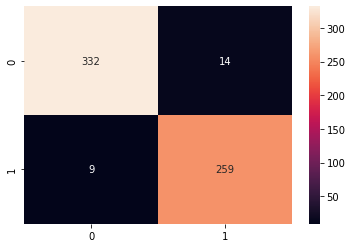

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

In [32]:
#SVM

In [33]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, gamma= 1, kernel='sigmoid', random_state=42)

In [34]:
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='sigmoid', random_state=42)

In [35]:
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Accuracy of training data: ', svc_model.score(X_train, y_train))
print('Accuracy of validation data: ',svc_model.score(X_test, y_test))

Accuracy of training data:  0.7839305103148752
Accuracy of validation data:  0.8013029315960912


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
# generating classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       346
           1       0.78      0.75      0.77       268

    accuracy                           0.80       614
   macro avg       0.80      0.80      0.80       614
weighted avg       0.80      0.80      0.80       614



In [37]:
confusion_matrix(y_test, prediction)

array([[290,  56],
       [ 66, 202]])

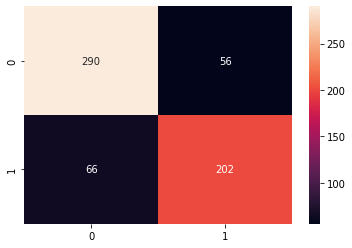

In [38]:
sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='0.0f')

In [39]:
#k-nearest neighbor

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [41]:
neighbour = []
accuracy = []
for k in range(1, 20):
  k_near = KNeighborsClassifier(n_neighbors=k)
  k_near.fit(X,y)
  Y_pre_test = k_near.predict(X_test)
  Y_pre_train = k_near.predict(X_train)
  test_accurry = accuracy_score(Y_pre_test, y_test)
  neighbour.append(k)
  accuracy.append(test_accurry)

Text(0, 0.5, 'accuracy')

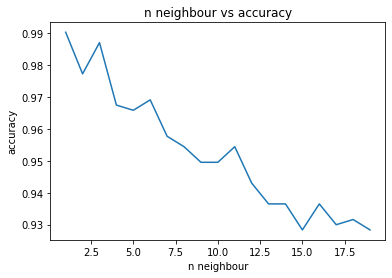

In [42]:
plt.plot(neighbour, accuracy)
plt.title('n neighbour vs accuracy')
plt.xlabel('n neighbour')
plt.ylabel('accuracy')

In [44]:
#we can  see that highest accuracy is for k=1

In [45]:
k_near = KNeighborsClassifier(n_neighbors=1)
k_near.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
Y_pre_test = k_near.predict(X_test)
Y_pre_train = k_near.predict(X_train)

In [47]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(Y_pre_train, y_train)
test_accurry = accuracy_score(Y_pre_test, y_test)
print('Accuracy for train dataset for K-neariest : ', train_accurry)
print('Accuracy for test dataset for K-neariest : ', test_accurry)

Accuracy for train dataset for K-neariest :  0.996199782844734
Accuracy for test dataset for K-neariest :  0.9495114006514658


In [48]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_pre_test ))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       346
           1       0.93      0.95      0.94       268

    accuracy                           0.95       614
   macro avg       0.95      0.95      0.95       614
weighted avg       0.95      0.95      0.95       614



In [49]:
confusion_matrix(y_test, Y_pre_test )

array([[328,  18],
       [ 13, 255]])

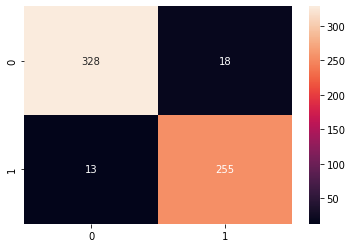

In [50]:
sns.heatmap(confusion_matrix(y_test, Y_pre_test), annot = True, fmt='0.0f')

In [51]:
#logistic regreesion

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lgr = LogisticRegression(random_state=0)
lgr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [54]:
y_pre_test = lgr.predict(X_test)
y_pre_train = lgr.predict(X_train)

In [55]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pre_train, y_train)
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for train dataset for logistic reg : ', train_accurry)
print('Accuracy for test dataset for logistic reg : ', test_accurry)

Accuracy for train dataset for logistic reg :  0.9505971769815418
Accuracy for test dataset for logistic reg :  0.9267100977198697


In [56]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pre_test ))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       346
           1       0.92      0.91      0.92       268

    accuracy                           0.93       614
   macro avg       0.93      0.92      0.93       614
weighted avg       0.93      0.93      0.93       614



In [57]:
confusion_matrix(y_test, y_pre_test )

array([[326,  20],
       [ 25, 243]])

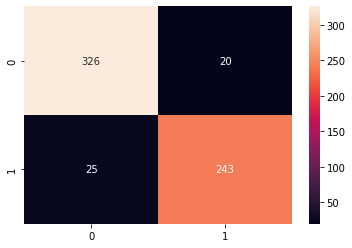

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pre_test), annot = True, fmt='0.0f')

In [60]:
#naive bayes

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB, ComplementNB

In [62]:
nvb = BernoulliNB()
nvb.fit(X_train,y_train)

BernoulliNB()

In [63]:
y_pre_test = nvb.predict(X_test)
y_pre_train = nvb.predict(X_train)

In [64]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pre_train, y_train)
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for train dataset for naive bayes  reg :  0.9120521172638436
Accuracy for test dataset for naive bayes reg :  0.9055374592833876


In [65]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pre_test ))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       346
           1       0.89      0.90      0.89       268

    accuracy                           0.91       614
   macro avg       0.90      0.90      0.90       614
weighted avg       0.91      0.91      0.91       614



In [66]:
confusion_matrix(y_test, y_pre_test)

array([[316,  30],
       [ 28, 240]])

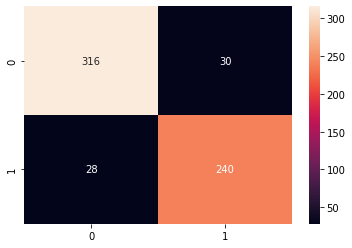

In [67]:
sns.heatmap(confusion_matrix(y_test, y_pre_test), annot = True, fmt='0.0f')

In [68]:
#adaboost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=42)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [70]:
clf.score(X_train, y_train)

0.9554831704668838

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9364820846905537


In [72]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       346
           1       0.94      0.91      0.93       268

    accuracy                           0.94       614
   macro avg       0.94      0.93      0.94       614
weighted avg       0.94      0.94      0.94       614



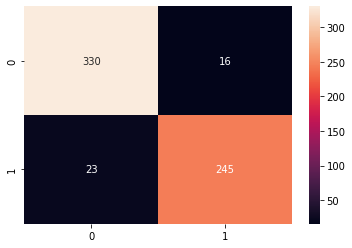

In [73]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

In [74]:
#xgboost

In [75]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[320  26]
 [ 16 252]]


0.9315960912052117

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9315960912052117


In [78]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       346
           1       0.91      0.94      0.92       268

    accuracy                           0.93       614
   macro avg       0.93      0.93      0.93       614
weighted avg       0.93      0.93      0.93       614



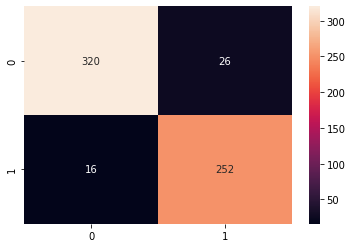

In [79]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

In [81]:
from sklearn.ensemble import VotingClassifier

In [82]:
model_1 = RandomForestClassifier(n_estimators=100)
model_2 = KNeighborsClassifier(n_neighbors=1)
model_3 = LogisticRegression(random_state=0)
model_4 = BernoulliNB()
model_5 = DecisionTreeClassifier()
model_6 = XGBClassifier()
model_7 = AdaBoostClassifier()
ensemble = VotingClassifier(estimators=[('RandomForest', model_1), ('KNN', model_2), ('LogisticRegression', model_3), ('NaiveBayes', model_4),
                                        ('DT', model_5), ('XGB',model_6), ('ADABoost', model_7), ], voting='hard')

In [83]:
ensemble.fit(X_train, y_train)
y_pred_test = ensemble.predict(X_test)
y_pred_train = ensemble.predict(X_train)

In [84]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pred_train, y_train)
test_accurry = accuracy_score(y_pred_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for train dataset for naive bayes  reg :  0.9777415852334419
Accuracy for test dataset for naive bayes reg :  0.9429967426710097


In [85]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(ensemble, open(filename, 'wb'))